# A. rollout figure

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

script_path = os.path.realpath(os.path.dirname(__name__))
os.chdir(script_path)
sys.path.append("/workspace/collab-environment/")
sys.path.append("/workspace/collab-environment/collab_env/gnn")
sys.path.append("/workspace/collab-environment/collab_env/data/boids")

In [3]:
from itertools import combinations
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import torch.nn.functional as functional
from torch.utils.data import random_split
from torch_geometric.data import DataLoader

from collab_env.data.file_utils import expand_path, get_project_root

In [4]:
from collab_env.gnn.gnn import get_adjcency_from_debug, plot_log_loss, train_rules_gnn, load_model, save_model, debug_result2prediction
from collab_env.gnn.gnn_definition import GNN, Lazy
from collab_env.data.boids.animal_simulation import visualize_graph_2sets, static_visualize_2sets

from collab_env.gnn.utility import dataset2testloader

### 1. Data

In [5]:
data_names = ['boid_single_species_basic', # without food
              'boid_food_basic_alignment'] # with food

data = {}


for data_name in data_names:
    file_name = f'{data_name}.pt'
    config_name = f'{data_name}_config.pt'
    
    dataset = torch.load(expand_path(
            "simulated_data/" + file_name, get_project_root()), weights_only = False)
    species_configs = torch.load(expand_path(
            "simulated_data/" + config_name, get_project_root()), weights_only = False)

    test_loader = dataset2testloader(dataset)

    data[data_name] = {}
    data[data_name]["file_name"] = file_name
    data[data_name]["config_name"] = config_name
    data[data_name]["dataset"] = dataset
    data[data_name]["species_configs"] = species_configs
    data[data_name]['test_loader'] = test_loader


/workspace/conda/envs/gnn/lib/python3.13/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


### 2. Load models and rollout trajectories.

In [6]:
### load models, different dataset has a different model
base_name = "vpluspplus_a"
noise_level = 0
rollout = 5

models = {}
model_spec = {}
train_spec = {}

for data_name in data_names:
    model_name = base_name
        
    file_name = f"{data_name}_{model_name}_noise_{noise_level}"

    rollout_path = expand_path(
            f"trained_models/{file_name}_rollout_{rollout}.pkl",
            get_project_root()
    )
    
    models[data_name] = {}
    models[data_name]["model"], model_spec[data_name], train_spec[data_name] = load_model(model_name, file_name)
    
    with open(rollout_path, "rb") as f: # 'wb' for write binary
        models[data_name]["rollout_debug_result"] = pickle.load(f)
    
print(models.keys())

Loaded model spec.
Loaded training spec.
Loaded model.
Loaded model spec.
Loaded training spec.
Loaded model.
dict_keys(['boid_single_species_basic', 'boid_food_basic_alignment'])


### 3. Plot 

In [7]:
models.keys()

dict_keys(['boid_single_species_basic', 'boid_food_basic_alignment'])

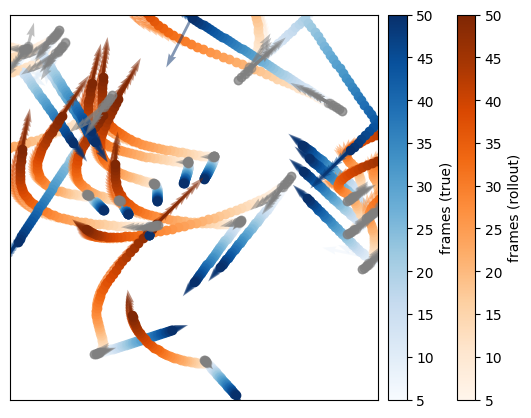

In [50]:
%matplotlib inline

file_id = 7

m = 'boid_single_species_basic'
rollout_debug_result = models[m]["rollout_debug_result"]
actual_pos, actual_vel, actual_acc, gnn_pos, gnn_vel, gnn_acc, frame_sets = debug_result2prediction(
                    rollout_debug_result,
                    file_id = file_id, epoch_num = 0)


starting_frame = 0
rollout_starting_frame = 5
ending_frame = 50
ax = static_visualize_2sets(actual_pos[0], actual_vel[0], gnn_pos[0], gnn_vel[0],
                starting_frame = starting_frame, rollout_starting_frame = rollout_starting_frame, 
                            ending_frame = ending_frame)

### 4. Load ablated models and rollout trajectories.

In [51]:
### load models, different dataset has a different model
base_name = "vpluspplus_a"
noise_level = 0
rollout = 5

models_a = {}
model_spec_a = {}
train_spec_a = {}

for data_name in data_names:
    model_name = base_name
        
    file_name = f"{data_name}_{model_name}_noise_{noise_level}"

    rollout_path = expand_path(
            f"trained_models/{file_name}_ablated_rollout_{rollout}.pkl",
            get_project_root()
    )
    
    models_a[data_name] = {}
    models_a[data_name]["model"], model_spec_a[data_name], train_spec_a[data_name] = load_model(
        model_name, file_name)
    
    with open(rollout_path, "rb") as f: # 'wb' for write binary
        models_a[data_name]["rollout_debug_result"] = pickle.load(f)
    
print(models.keys())

Loaded model spec.
Loaded training spec.
Loaded model.
Loaded model spec.
Loaded training spec.
Loaded model.
dict_keys(['boid_single_species_basic', 'boid_food_basic_alignment'])


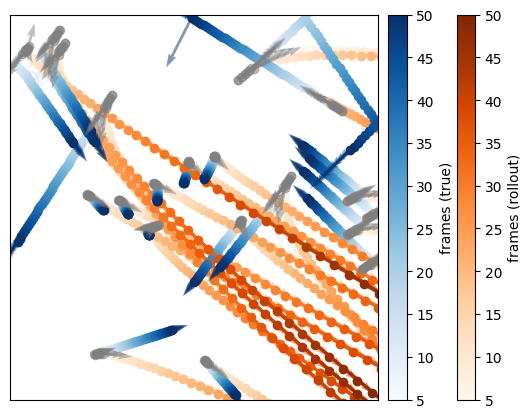

In [53]:
%matplotlib inline

file_id = 7

m = 'boid_single_species_basic'
rollout_debug_result = models_a[m]["rollout_debug_result"]
actual_pos, actual_vel, actual_acc, gnn_pos, gnn_vel, gnn_acc, frame_sets = debug_result2prediction(
                    rollout_debug_result,
                    file_id = file_id, epoch_num = 0)


starting_frame = 0
rollout_starting_frame = 5
ending_frame = 50
ax = static_visualize_2sets(actual_pos[0], actual_vel[0], gnn_pos[0], gnn_vel[0],
                starting_frame = starting_frame, rollout_starting_frame = rollout_starting_frame, 
                            ending_frame = ending_frame)